# World Happiness: Which Countries Are The Happiest?

This dataset found on Kaggle focuses on a survey conducted by the World Happiness Report, a landmark survey of the state of global happiness which ranks 156 countries by the perception of happiness of its citizens. The survey takes into account multiple categories such as perception of freedom, GDP, and life expectancy. This dataset is to show any correlations between scores between each category and their rankings, as well as correlations between categories. Seeing any correlation in rank would show just how much a score in each category would affect the overall ranking. The scores are based on a Cantril Ladder, a scale widely used by Gallup researchers. The scale takes into account multiple variables in order to create a multifaceted form of measurement, allowing for rankings to be explained by a variety of arguments.

In [97]:
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [98]:
#Load the csv file
happiness = pd.read_csv("world-happiness-report-2019.csv")

## Brief Explanation of the Columns in Relation to World Happiness

Ladder - Cantril Ladder is a measure of life satisfaction.

SD of Ladder - Standard deviation of the ladder.

Positive Affect - Measure of positive emotion.

Negative affect - Measure of negative emotion.

Social support - The extent to which Social support contributed to the calculation of the Happiness Score.

Freedom - The extent to which Freedom contributed to the calculation of the Happiness Score.

Corruption - The extent to which Perception of Corruption contributes to Happiness Score.

Generosity - The extent to which Generosity contributed to the calculation of the Happiness Score.

Log of GDP per capita - The extent to which GDP contributes to the calculation of the Happiness Score.

Healthy life expectancy - The extent to which Life expectancy contributed to the calculation of the Happiness Score.



In [66]:
happiness.columns

Index(['Country (region)', 'Ladder', 'SD of Ladder', 'Positive affect',
       'Negative affect', 'Social support', 'Freedom', 'Corruption',
       'Generosity', 'Log of GDP\nper capita', 'Healthy life\nexpectancy'],
      dtype='object')

In [102]:
happiness = pd.DataFrame(happiness)

happiness = happiness.rename(columns={"Log of GDP\nper capita" :"GDP per capita",
                                      "Healthy life\nexpectancy" :"Healthy life expectancy"})

happiness.head()

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,GDP per capita,Healthy life expectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


In [103]:
happiness_us = happiness.loc[happiness["Country (region)"] == "United States"]

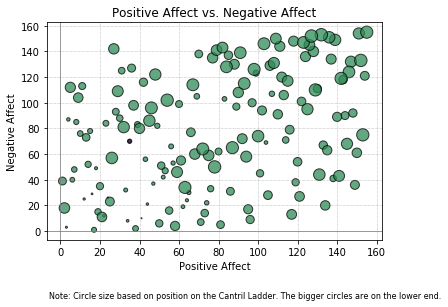

<Figure size 432x288 with 0 Axes>

In [104]:
#Positive Affect vs. Negative Affect
positive = happiness["Positive affect"]
negative = happiness["Negative affect"]
size = happiness["Ladder"]

#Positive Affect vs. Negative Affect for the United States
positive_us = happiness_us["Positive affect"]
negative_us = happiness_us["Negative affect"]
size_us = happiness_us["Ladder"]

#Scatter Plot
plt.scatter(positive, negative, marker = "o", color = "seagreen", s = size, edgecolors = "black", alpha = 0.75)
plt.scatter(positive_us, negative_us, marker = "o", color = "purple", s = size * 10, edgecolors = "black", alpha = 0.75)
plt.title("Positive Affect vs. Negative Affect")
plt.xlabel("Positive Affect")
plt.ylabel("Negative Affect")

# Create gridlines
plt.axhline(y=0, color='grey', zorder=1, linewidth=0.75)
plt.axvline(x=0, color='grey', zorder=1, linewidth=0.75)
plt.text(-6, -52, "Note: Circle size based on position on the Cantril Ladder. The bigger circles are on the lower end.",
         fontsize=8)
plt.grid(color='grey', zorder=1, linestyle='dotted', linewidth=0.5)

plt.show()

# Save graph
plt.savefig("Visualizations/positive_vs_negative.png", dpi=180, bbox_inches="tight")

There does not seem to be any correlation between the nations rankings in the positive affect vs the negative affect. The United States is represented in purple in this scatter plot.

## Rank in Cantril Ladder Compared to Standard Deviation

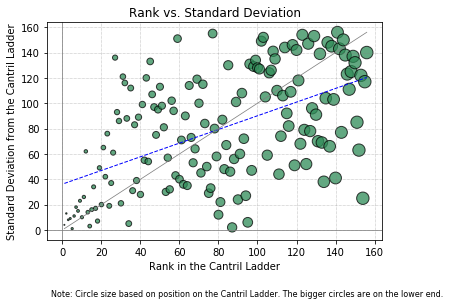

In [100]:
#Ladder position vs. Standard Deviation based on overall scores that were recorded
ladder = happiness["Ladder"]
sd_ladder = happiness["SD of Ladder"]

#Scatter plot
plt.scatter(ladder, sd_ladder, marker = "o", color = "seagreen", s = size, edgecolors = "black", alpha = 0.75)
plt.title("Rank vs. Standard Deviation")
plt.xlabel("Rank in the Cantril Ladder")
plt.ylabel("Standard Deviation from the Cantril Ladder")

#Linear Regression 
(slope, intercept, _, _, _) = linregress(ladder, sd_ladder)
fit = slope * ladder + intercept
plt.plot(ladder, fit, '--', zorder=3, color="blue", linewidth=1)

plt.axhline(y=0, color='grey', zorder=1, linewidth=0.75)
plt.axvline(x=0, color='grey', zorder=1, linewidth=0.75)
plt.text(-6, -52, "Note: Circle size based on position on the Cantril Ladder. The bigger circles are on the lower end.",
         fontsize=8)
plt.grid(color='grey', zorder=1, linestyle='dotted', linewidth=0.5)

plt.plot(ladder, ladder, zorder=3, color='grey', linewidth=0.75)

# Save graph
plt.savefig("Visualizations/rank_vs_stdeviation.png", dpi=180, bbox_inches="tight")

## How Much Influence Does GDP Have On The World Happiness Scale?

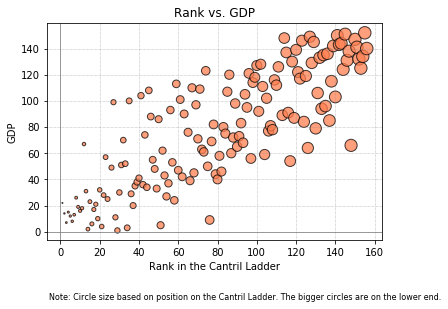

In [105]:
gdp = happiness["GDP per capita"]

plt.scatter(ladder, gdp, marker = "o", color = "coral", s = size, edgecolors = "black", alpha = 0.75)
plt.title("Rank vs. GDP")
plt.xlabel("Rank in the Cantril Ladder")
plt.ylabel("GDP")

plt.axhline(y=0, color='grey', zorder=1, linewidth=0.75)
plt.axvline(x=0, color='grey', zorder=1, linewidth=0.75)
plt.text(-6, -52, "Note: Circle size based on position on the Cantril Ladder. The bigger circles are on the lower end.",
         fontsize=8)
plt.grid(color='grey', zorder=1, linestyle='dotted', linewidth=0.5)

# Save graph
plt.savefig("Visualizations/rank_vs_gdp.png", dpi=180, bbox_inches="tight")

The lower the amount that GDP contributes to the score, the higher the rank of the country.

## Looking at GDP and Life Expectancy in the Happiness Score of the Top 10 Countries

In [79]:
happiness_top_ten = happiness.head(10)

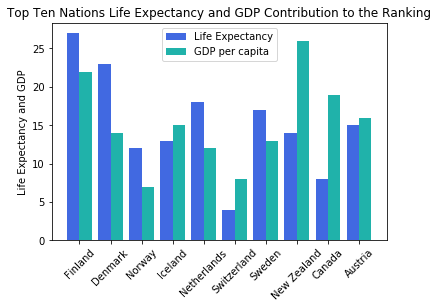

In [106]:
top_ten = np.arange(len(happiness_top_ten))
life_expectancy = happiness_top_ten["Healthy life expectancy"]
gdp_top_ten = happiness_top_ten["GDP per capita"]

labels = []
labels.extend(happiness_top_ten['Country (region)'].tolist())
    
#Creating the bar chart
width = 0.40
fig = plt.figure()
ax = fig.add_subplot(111)

Life_exp = ax.bar(top_ten, life_expectancy, width, color = "royalblue")
GDP_top = ax.bar(top_ten + width, gdp_top_ten, width, color = "lightseagreen")

ax.set_ylabel('Life Expectancy and GDP')
ax.set_title('Top Ten Nations Life Expectancy and GDP Contribution to the Ranking')
ax.set_xticks(top_ten + width / 2)
ax.set_xticklabels( (labels) )
plt.xticks(rotation = 45)

ax.legend( (Life_exp[0], GDP_top[0]), ('Life Expectancy', 'GDP per capita') )

# Save graph
plt.savefig("Visualizations/top_ten.png", dpi=180, bbox_inches="tight")

## Comparing GDP per Capita and Life Expectancy For Every Country Listed Under

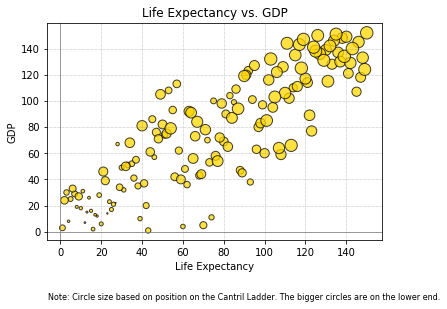

In [93]:
life_expectancy_all = happiness["Healthy life expectancy"]

plt.scatter(life_expectancy_all, gdp, marker = "o", color = "gold", s = size, edgecolors = "black", alpha = 0.75)
plt.title("Life Expectancy vs. GDP")
plt.xlabel("Life Expectancy")
plt.ylabel("GDP")

plt.axhline(y=0, color='grey', zorder=1, linewidth=0.75)
plt.axvline(x=0, color='grey', zorder=1, linewidth=0.75)
plt.text(-6, -52, "Note: Circle size based on position on the Cantril Ladder. The bigger circles are on the lower end.",
         fontsize=8)
plt.grid(color='grey', zorder=1, linestyle='dotted', linewidth=0.5)

# Save graph
plt.savefig("Visualizations/metro_scatter.png", dpi=180, bbox_inches="tight")

There is a strong positive correlation between GDP scores and the Expected life expectancy scores. Countries that had higher rankings had lower contributions of each.

## Comparing Freedom to Rank On World Happiness

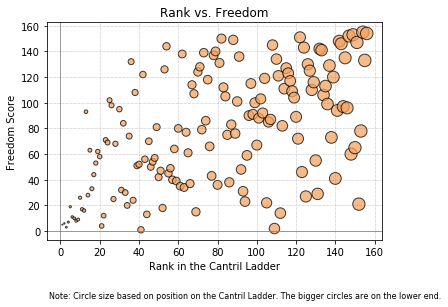

In [96]:
freedom = happiness["Freedom"]

#Scatter plot
plt.scatter(ladder, freedom, marker = "o", color = "sandybrown", s = size, edgecolors = "black", alpha = 0.75)
plt.title("Rank vs. Freedom")
plt.xlabel("Rank in the Cantril Ladder")
plt.ylabel("Freedom Score")

# Create gridlines
plt.axhline(y=0, color='grey', zorder=1, linewidth=0.75)
plt.axvline(x=0, color='grey', zorder=1, linewidth=0.75)
plt.text(-6, -52, "Note: Circle size based on position on the Cantril Ladder. The bigger circles are on the lower end.",
         fontsize=8)
plt.grid(color='grey', zorder=1, linestyle='dotted', linewidth=0.5)

plt.show()

Aside from the opposite ends of the ranking, freedom contribution to the Catrill score largely varies in the middle ranks with little to no correlation. It can still be assumed that the more an element in the score contributes to the score, the lower the ranking.

## Conclusion

The Cantril Ladder measures the overall happiness of a nation using many different metrics. It can be concluded that the higher a certain score on any of the categories, the lower the overall rank of the country meaning the number for the overall would be a larger value, whereas lower value scores on a consistent basis bump the overall rank. This would mean consistent single digit scores for each category would mean a country would likely place in the top 10 overall, making it among the happiest countries. For each of the scores, the numbers are unique as each country does not share the same numerical ranking in any categories. For instance, a 10 in Generosity can only be applied to one country. In order for countries to have a higher overall rank, most of the categories must have a lower score, and in order to have a lower standard deviation must have similar scores throughout.